## Bengaluru Houses Price Prediction
### Author: Prajwal S (prajwalk7@gmail.com)

In [6]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os
os.chdir('/content/drive/My Drive/')
os.getcwd()

'/content/drive/My Drive'

In [8]:
#loading the dataset
bdf = pd.read_csv('Bengaluru_House_Data.csv')

In [9]:
bdf.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
#shape of the dataframe
bdf.shape

(13320, 9)

In [11]:
bdf.groupby('area_type').area_type.count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
bdf.groupby('availability').availability.count()

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [13]:
#renaming 'size' column
bdf.rename(columns = {'size':'house_type'}, inplace = True)

In [14]:
bdf.groupby('house_type').house_type.count()

house_type
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: house_type, dtype: int64

In [15]:
#dropping 'society' and 'availability' columns
bdf = bdf.drop(['society', 'availability'], axis = 1)

In [16]:
bdf.head()

,area_type,location,house_type,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
#checking for missing values
bdf.isnull().sum()

area_type       0
location        1
house_type     16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [18]:
#removing 'house_type' and adding cleaned 'house_type_clean' column
bdf['house_type_clean'] = bdf.house_type.map(lambda x: float(str(x).split(' ')[0]))
bdf = bdf.drop('house_type', axis = 1)

In [19]:
#dropping rows will null values for 'house_type_clean
bdf = bdf.dropna(axis = 0, subset = ['house_type_clean'])
bdf.house_type_clean.value_counts()

2.0     5528
3.0     4857
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
18.0       1
14.0       1
12.0       1
43.0       1
19.0       1
13.0       1
16.0       1
Name: house_type_clean, dtype: int64

In [20]:
bdf.head()

,area_type,location,total_sqft,bath,balcony,price,house_type_clean
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0


In [21]:
bdf.house_type_clean.isnull().sum()

0

In [22]:
bdf.house_type_clean.unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [23]:
bdf.house_type_clean = bdf.house_type_clean.astype('int64')
bdf.bath = bdf.bath.dropna().astype('int64')

In [24]:
#getting median values of 'bath' according to the corresponding value of 'house_type_clean' and storing it in a dictionary
bath_fill_by_type = {}
for i in list(bdf['house_type_clean'].unique()):
  a=bdf.loc[bdf['house_type_clean'] == i, ['bath']].dropna().median()
  bath_fill_by_type[i] = int(a.values)

In [25]:
bdf['bath_clean'] = bdf['bath'].fillna(bdf['house_type_clean'].apply(lambda x: bath_fill_by_type.get(x)))
bdf['bath_clean'] = bdf['bath_clean'].astype('int64')

In [26]:
bdf = bdf.drop('bath', axis = 1)
bdf.head()

,area_type,location,total_sqft,balcony,price,house_type_clean,bath_clean
0,Super built-up Area,Electronic City Phase II,1056,1.0,39.07,2,2
1,Plot Area,Chikka Tirupathi,2600,3.0,120.00,4,5
2,Built-up Area,Uttarahalli,1440,3.0,62.00,3,2
3,Super built-up Area,Lingadheeranahalli,1521,1.0,95.00,3,3
4,Super built-up Area,Kothanur,1200,1.0,51.00,2,2


In [27]:
bdf.balcony.isnull().value_counts()

False    12711
True       593
Name: balcony, dtype: int64

In [28]:
#getting median values of 'bath' according to the corresponding value of 'house_type_clean' and storing it in a dictionary
balcony_fill_by_type = {}
for i in list(bdf['house_type_clean'].unique()):
  a=bdf.loc[bdf['house_type_clean'] == i, ['balcony']].dropna().median()
  balcony_fill_by_type[i] = a.values[0]

In [29]:
for k in [16, 18, 19]:
    del balcony_fill_by_type[k]

In [30]:
bdf.balcony.isnull().value_counts()

False    12711
True       593
Name: balcony, dtype: int64

In [31]:
bdf['balcony_clean'] = bdf['balcony'].fillna(bdf['house_type_clean'].apply(lambda x: bath_fill_by_type.get(x)))
bdf['balcony_clean'] = bdf['balcony_clean'].astype('int64')

In [32]:
bdf.balcony_clean.isnull().value_counts()

False    13304
Name: balcony_clean, dtype: int64

In [33]:
bdf = bdf.drop(['balcony'], axis = 'columns')
bdf.head()

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean
0,Super built-up Area,Electronic City Phase II,1056,39.07,2,2,1
1,Plot Area,Chikka Tirupathi,2600,120.00,4,5,3
2,Built-up Area,Uttarahalli,1440,62.00,3,2,3
3,Super built-up Area,Lingadheeranahalli,1521,95.00,3,3,1
4,Super built-up Area,Kothanur,1200,51.00,2,2,1


In [34]:
bdf.isnull().sum()

area_type           0
location            1
total_sqft          0
price               0
house_type_clean    0
bath_clean          0
balcony_clean       0
dtype: int64

In [35]:
bdf = bdf[bdf['location'].notna()]

In [36]:
#after removing and imputing missing the null entries
bdf.isnull().sum()

area_type           0
location            0
total_sqft          0
price               0
house_type_clean    0
bath_clean          0
balcony_clean       0
dtype: int64

In [37]:
#now exploring the 'total_sqft' column
bdf.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
#defining a function to return all the non unifrom values
def unif(bdf):
  try:
     float(bdf)
  except:
    return False
  return True

In [39]:
#return a dataframe(use '~' for negation)
bdf[~bdf['total_sqft'].apply(unif)]

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean
30,Super built-up Area,Yelahanka,2100 - 2850,186.000,4,4,0
56,Built-up Area,Devanahalli,3010 - 3410,192.000,4,4,4
81,Built-up Area,Hennur Road,2957 - 3450,224.500,4,4,4
122,Super built-up Area,Hebbal,3067 - 8156,477.000,4,4,0
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,54.005,2,2,0
...,...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,1804 - 2273,122.000,3,3,0
13059,Super built-up Area,Harlur,1200 - 1470,72.760,2,2,0
13240,Super built-up Area,Devanahalli,1020 - 1130,52.570,1,1,1
13265,Super built-up Area,Hoodi,1133 - 1384,59.135,2,2,0


In [40]:
#writing a function to return average of ranges
def conv_to(bdf):
  a = bdf.split('-')
  if len(a) == 2:
    return (float(a[0]) + float(a[1]))/2
  try:
    return float(bdf)
  except:
    return None

In [41]:
#transforming all the non uniform values
bdf['total_sqft'] = bdf['total_sqft'].apply(conv_to)

In [42]:
bdf[~bdf['total_sqft'].apply(unif)]

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean


In [43]:
#now lets create a new feature for price per square feet
bdf['price_per_sqft'] = (bdf['price'] * 100000)/bdf['total_sqft']
bdf.head()

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,39.07,2,2,1,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,120.00,4,5,3,4615.384615
2,Built-up Area,Uttarahalli,1440.0,62.00,3,2,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,95.00,3,3,1,6245.890861
4,Super built-up Area,Kothanur,1200.0,51.00,2,2,1,4250.000000


In [44]:
#exploring location column
bdf['location'] = bdf['location'].apply(lambda x: x.strip())
bdf.location.nunique()

1293

In [45]:
loc_stats = bdf.groupby('location')['location'].count().sort_values(ascending = False)
loc_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [46]:
loc_stats_below_ten = loc_stats[loc_stats <= 10]
loc_stats_below_ten

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [47]:
#naming all the less frequent locations in the dataset as other
bdf['location'] = bdf['location'].apply(lambda x: 'other' if x in loc_stats_below_ten else x)

In [48]:
bdf.location.value_counts()

other                 2882
Whitefield             540
Sarjapur  Road         397
Electronic City        304
Kanakpura Road         273
                      ... 
Narayanapura            11
HAL 2nd Stage           11
Pattandur Agrahara      11
Kodigehalli             11
Tindlu                  11
Name: location, Length: 242, dtype: int64

In [49]:
#now checking the size of the house per bedroom and detecting outliers and removing them
bdf[bdf['total_sqft']/bdf['house_type_clean'] < 300].head()

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean,price_per_sqft
9,Plot Area,other,1020.0,370.0,6,6,6,36274.509804
45,Plot Area,HSR Layout,600.0,200.0,8,9,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,150.0,6,4,1,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,85.0,8,7,0,6296.296296
70,Plot Area,other,500.0,100.0,3,3,2,20000.000000


In [50]:
bdf = bdf[~(bdf['total_sqft']/bdf['house_type_clean'] < 300)]

In [74]:
bdf.shape

(10286, 8)

In [51]:
#now similarly try to detect outliers based on price/sqft
bdf.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [71]:
#this function removes the outliers based on price_per_sqft value grouped by location
def remove_ppsft_outliers(bdf):
  df_out = pd.DataFrame()
  for k, v in bdf.groupby('location'):
    m = np.mean(v.price_per_sqft)
    st = np.std(v.price_per_sqft)
    sub_df = v[(v.price_per_sqft < (m+st)) & (v.price_per_sqft > (m-st))]
    df_out = pd.concat([df_out, sub_df], ignore_index = True)
  return df_out

In [72]:
bdf = remove_ppsft_outliers(bdf)

In [73]:
bdf.shape

(10286, 8)

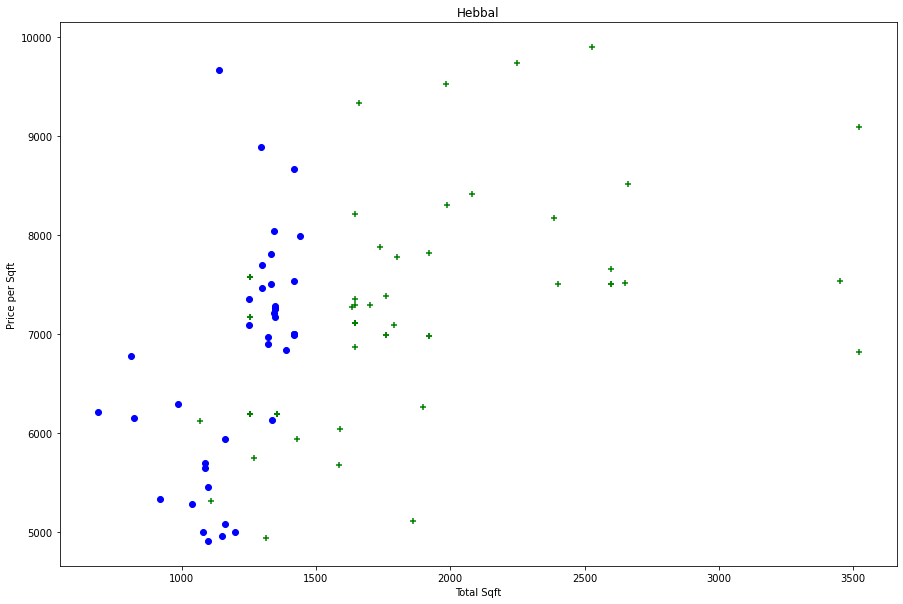

In [83]:
#the following plot shows more anomolies and outliers in the dataset; same sqft area shows 3bk to be cheaper than 2bhk
def plot_scatter_plot(bdf, location):
  bhk2 = bdf[(bdf['location'] == location) & (bdf['house_type_clean'] == 2)]
  bhk3 = bdf[(bdf['location'] == location) & (bdf['house_type_clean'] == 3)]
  plt.figure(figsize=(15,10))
  plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = 'blue', label = '2BHK')
  plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color = 'green', label = '3BHK', marker = '+')
  plt.xlabel('Total Sqft')
  plt.ylabel('Price per Sqft')
  plt.title(location)

plot_scatter_plot(bdf, "Hebbal")

In [85]:
 #Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('house_type_clean'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('house_type_clean'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

bdf = remove_bhk_outliers(bdf)
bdf.shape

(7353, 8)

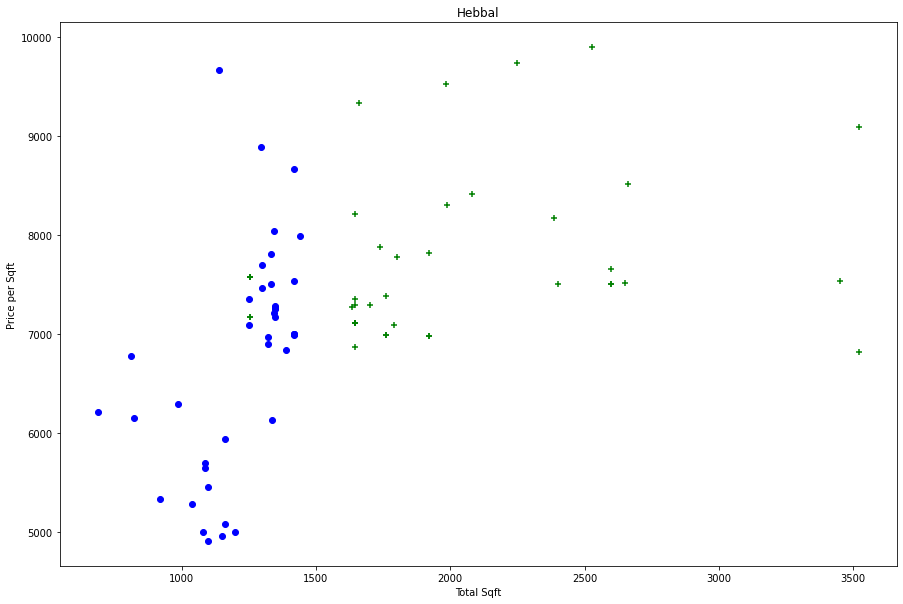

In [86]:
#a major chunk of the green data points overlapping with the blue data points are now gone
plot_scatter_plot(bdf, "Hebbal")

In [87]:
#now lets examine bath_clean column closely
bdf[bdf.bath_clean > 10]

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,4000.0,160.0,10,12,10,4000.000000
8530,Super built-up Area,other,12000.0,525.0,10,12,10,4375.000000
8619,Super built-up Area,other,10000.0,550.0,16,16,16,5500.000000
9352,Super built-up Area,other,6000.0,150.0,11,12,10,2500.000000
9683,Super built-up Area,other,5425.0,275.0,13,13,0,5069.124424


In [89]:
#lets look at cases when the number of bathrooms exceed the number of room by more than 2(anomoly), so lets remove these
bdf[bdf.bath_clean > bdf.house_type_clean + 2]

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean,price_per_sqft
1634,Built-up Area,Chikkabanavar,2460.0,80.0,4,7,2,3252.032520
5267,Built-up Area,Nagasandra,7000.0,450.0,4,8,4,6428.571429
6748,Super built-up Area,Thanisandra,1806.0,116.0,3,6,2,6423.034330
8455,Super built-up Area,other,11338.0,1000.0,6,9,1,8819.897689


In [90]:
bdf = bdf[bdf.bath_clean < bdf.house_type_clean + 2]

In [91]:
#lets also remove the column 'price_per_sqft'
bdf = bdf.drop('price_per_sqft', axis = 'columns') 

In [92]:
bdf.head()

,area_type,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean
0,Super built-up Area,1st Block Jayanagar,2850.0,428.0,4,4,1
1,Super built-up Area,1st Block Jayanagar,1630.0,194.0,3,3,2
2,Super built-up Area,1st Block Jayanagar,1875.0,235.0,3,2,3
3,Built-up Area,1st Block Jayanagar,1200.0,130.0,3,2,0
4,Super built-up Area,1st Block Jayanagar,1235.0,148.0,2,2,2


In [94]:
bdf.area_type.isnull().sum()

0

In [95]:
pd.get_dummies(bdf.area_type)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
10277,0,1,0,0
10278,0,0,0,1
10281,0,0,0,1
10282,0,0,1,0


In [98]:
#lets convert areat_type column to category and label encode it
bdf['area_type'] = bdf['area_type'].astype('category')
bdf['area_type_clean'] = bdf['area_type'].cat.codes

In [97]:
bdf.area_type

0        Super built-up  Area
1        Super built-up  Area
2        Super built-up  Area
3              Built-up  Area
4        Super built-up  Area
                 ...         
10277            Carpet  Area
10278    Super built-up  Area
10281    Super built-up  Area
10282              Plot  Area
10285    Super built-up  Area
Name: area_type, Length: 7275, dtype: category
Categories (4, object): [Built-up  Area, Carpet  Area, Plot  Area, Super built-up  Area]

In [136]:
bdf.area_type_clean

0        3
1        3
2        3
3        0
4        3
        ..
10277    1
10278    3
10281    3
10282    2
10285    3
Name: area_type_clean, Length: 7275, dtype: int8

In [102]:
bdf = bdf.drop('area_type', axis = 'columns')


KeyError: ignored

In [103]:
bdf.head()

,location,total_sqft,price,house_type_clean,bath_clean,balcony_clean,area_type_clean
0,1st Block Jayanagar,2850.0,428.0,4,4,1,3
1,1st Block Jayanagar,1630.0,194.0,3,3,2,3
2,1st Block Jayanagar,1875.0,235.0,3,2,3,3
3,1st Block Jayanagar,1200.0,130.0,3,2,0,0
4,1st Block Jayanagar,1235.0,148.0,2,2,2,3


In [105]:
#now lets use one hot encoding by getting dummies for the location column
loc_dum = pd.get_dummies(bdf.location)

In [106]:
loc_dum

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [108]:
#now lets concatenate the original df columns with the dummies
bdf_new = pd.concat([bdf.drop('location', axis = 'columns'), loc_dum.drop('other', axis = 'columns')], axis = 'columns')
bdf_new.head()

,total_sqft,price,house_type_clean,bath_clean,balcony_clean,area_type_clean,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,428.0,4,4,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3,3,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,235.0,3,2,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,130.0,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,148.0,2,2,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
bdf_new.shape

(7275, 247)

In [110]:
X = bdf_new.drop('price', axis = 'columns')
X.head()

,total_sqft,house_type_clean,bath_clean,balcony_clean,area_type_clean,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,3,2,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
y = bdf_new.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [124]:
#using 20% of data for test, 80% for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =20)

In [125]:
#using linear regression to model the prediction
from sklearn.linear_model import LinearRegression

lr_bdf = LinearRegression()
lr_bdf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
lr_bdf.score(X_test, y_test)

0.8784131991735938

In [120]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.80681687, 0.77210859, 0.86431342, 0.83611726, 0.81683212])

In [123]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

,model,best_parameters,accuracy
0,linear_regression,{'normalize': True},0.819238
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.679585
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.678303


In [127]:
X.columns

Index(['total_sqft', 'house_type_clean', 'bath_clean', 'balcony_clean',
       'area_type_clean', '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=246)

In [134]:
# For finding the appropriate location
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

7

In [137]:
# Creating a fuction to predict values
def prediction(location, house_type_clean, bath_clean, balcony_clean, total_sqft, area_type):
    
    dict_area_type = {'Built-up Area': 0, 'Carpet Area':1 , 'Plot Area': 2, 'Super Built-up Area': 3}
    area_type_clean = dict_area_type.get(area_type)
    loc_index = int(np.where(X.columns==location)[0][0])
                   
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = house_type_clean
    x[2] = bath_clean
    x[3] = balcony_clean
    x[4] = area_type_clean
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_bdf.predict([x])[0]

In [140]:
#Prediction 1: Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction(location = '1st Block Jayanagar', house_type_clean = 2, bath_clean = 2, balcony_clean = 2, total_sqft = 1000, area_type = 'Built-up Area')

171.6516011274685

In [141]:
# Prediction 3: Input in the form : Location, BHK, Bath, Balcony, Sqft, area_type, availability.
prediction('1st Phase JP Nagar', 2, 3, 2, 2000, 'Plot Area')

173.82684823424594